### Using Python and SQL - create these three tables in database called: cms.db

    sid : Student Indentity
    cid : Course ID
    cname : Course name

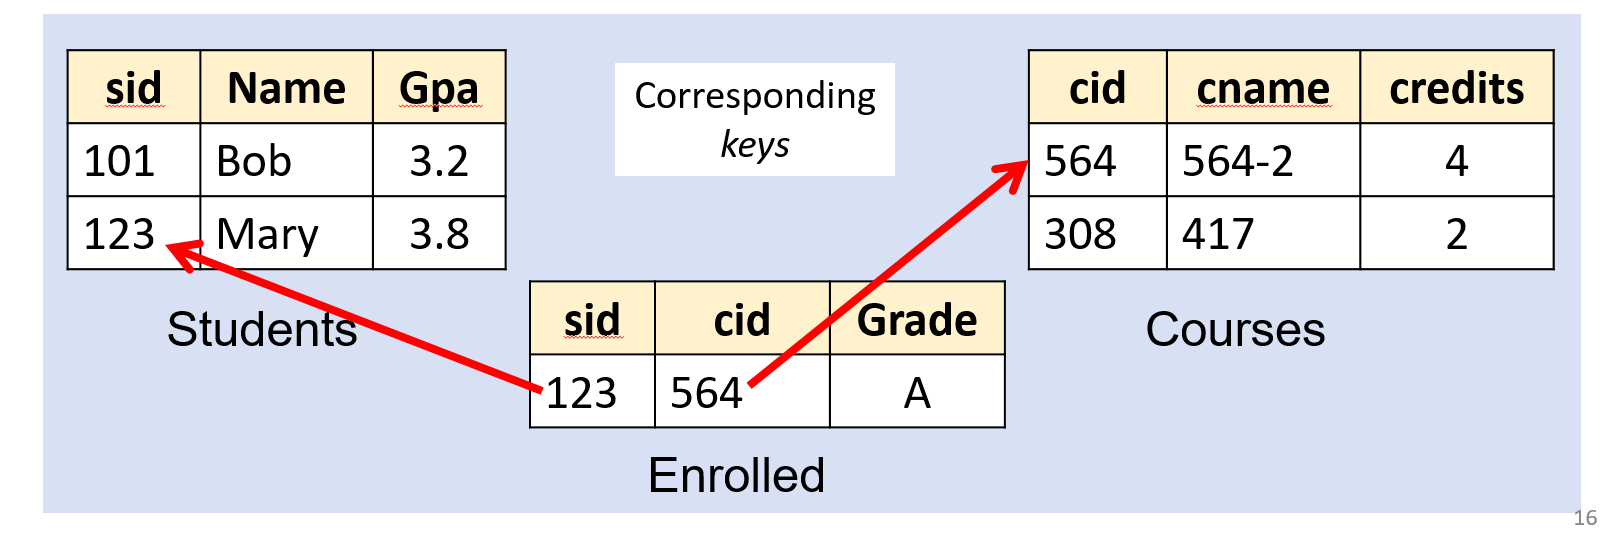





In [ ]:
### insert the following data to the respective table

    Students (sid, Name, GPA)
        101, Bob, 
        123, Mary, 
        132, Constance, 
        145, Castro, 
        155, Mary
        
        GPA is not known until after final exams.
        
    Course (cid, cname, credits)
        564, Calculus 2, 4
        365, Mobile Computing, 3
        445, Political Science, 3
    
    Enrolled(sid, cid, Grade)
        101, 564,
        132, 365,
        101, 365,
        155, 564,
        
    No grade is provided as the semester is still  ongoing.
    
    When final exams are over and graded, the grades are entered separately later.

Welcome to Course Management System ! Type ? to list commands
CMS > ?

Documented commands (type help <topic>):
add  database  exit  help  q1  students

CMS > exit
Bye

Exit from CMS
 


## Activities

    For all the questions below, it will be a good idea to use define functions so they can 
    be executed when needed somewhere.
    
    Call the required functions from within the interactive shell.
    
    Your output should be 'pretty'.

### Question 1

    List the students 

In [1]:
def question1():
    
    query1 =  "select * from enrolled"
    crsr = conn.cursor()
    crsr.execute(query1)
    ans= crsr.fetchall()
    for i in ans:
        print(i)
    

### Question 2

    List the courses

In [2]:
def question2():
    
    query2 =  "select cname from courses"
    crsr = conn.cursor()
    crsr.execute(query2)
    ans= crsr.fetchall()
    for i in ans:
        print(i)

### Question 3

    List the students who are taking courses

In [3]:

def question3():
    
    query3 =  """
    select distinct(name) from (select students.name, enrolled.cid
    from students inner join enrolled
    on students.sid = enrolled.sid)
     """
    
    crsr = conn.cursor()
    crsr.execute(query3)
    ans= crsr.fetchall()
    for i in ans:
        print(i)

### Question 4

    List the students who are not taking any courses

In [4]:
def question4():
    
    query4 =  """
    select sid, name from students where sid not in (select distinct(sid) from enrolled) 
     """
    
    crsr = conn.cursor()
    crsr.execute(query4)
    ans= crsr.fetchall()
    for i in ans:
        print(i)



### Question 5

    List the number of students per course

In [5]:
def question5():
    
    query5 =  """
   select cid, cname, count(sid) from (select enrolled.cid, enrolled.sid, courses.cname
    from enrolled inner join courses
    where enrolled.cid = courses.cid)
    group by cid order by count(cid) desc  
     """
    
    crsr = conn.cursor()
    crsr.execute(query5)
    ans= crsr.fetchall()
    for i in ans:
        print(i)


### Question 6

    List the courses that do not have students enrolled

In [6]:
def question6():
    
    query6 =  """
   select cid, cname from courses where cid not in (select distinct(cid) from enrolled) 
     """
    
    crsr = conn.cursor()
    crsr.execute(query6)
    ans= crsr.fetchall()
    for i in ans:
        print(i)


### Question 7

    Update these students with the following grade
    
    Bob (sid: 101) Course(cid:564) Calculus 2 Grade B+
    Bob (sid: 101) Course(cid:365) Mobile Computing Grade B+
    Constance(sid: 132) Course(cid:365) Mobile Computing A
    
    For this question, you can prompt the user for inputs for sid, cid and grade

In [7]:
def question7():
    #first input
    sidInput1 = input("input student id: ")
    cidInput1 = input("input course id: ")
    gradeInput1 = input("input grade: ")
    query7a ="UPDATE enrolled " +"set " + "cid=" + cidInput1 + "," + "grade='"+gradeInput1 + "'where sid="+ sidInput1
    print(query7a)

    

     #second input
    sidInput2 = input("input student id: ")
    cidInput2 = input("input course id: ")
    gradeInput2 = input("input grade: ")
    query7b ="UPDATE enrolled " +"set " + "cid=" + cidInput2 + "," + "grade='"+gradeInput2 + "'where sid="+ sidInput2
    print(query7b)
    
     #third input
    sidInput3 = input("input student id: ")
    cidInput3 = input("input course id: ")
    gradeInput3 = input("input grade: ")
    query7c ="UPDATE enrolled " +"set " + "cid=" + cidInput3 + "," + "grade='"+gradeInput3 + "'where sid="+ sidInput3
    print(query7c)
    
    #execute
    crsr = conn.cursor()
    crsr.executescript(query7a)
    crsr.executescript(query7b)
    crsr.executescript(query7c)
#     ans=crsr.fetchall()
#     for i in ans:
#         print(i)
    print("EXECUTED")
    
    

### Question 8

    Calculate the GPA for each student
    
    Those who do not take any courses will have 'None' or blank for their GPA

### Question 9

    Given a name of a student, bring up this student's enrollment and GPA
    If there are two students for the given name, then you need to find a way to provide the
    user a way to select the right student.
    

## Main Program to run all the questions

     Your interactive shell

In [8]:
def adding():
    
    threetable = """
    drop table if exists students; 
    drop table if exists courses; 
    drop table if exists enrolled; 
    create table students (sid int primary key, 
                       name varchar(20), 
                       gpa float);
    create table courses (cid int primary key, 
                      cname varchar(40), 
                      credits int);
    create table enrolled (sid int, 
                       cid int, 
                       grade varchar(20));

    INSERT INTO students (sid, name)
    VALUES (101, 'Bob');
    INSERT INTO students (sid, name)
    VALUES (123, 'Mary');
    INSERT INTO students (sid, name)
    VALUES (132, 'Constance');
    INSERT INTO students (sid, name)
    VALUES (145, 'Castro');
    INSERT INTO students (sid, name)
    VALUES (155, 'Mary');

    INSERT INTO courses (cid, cname, credits)
    VALUES (564, 'Calculus 2', 4);
    INSERT INTO courses (cid, cname, credits)
    VALUES (365, 'Mobile Computing', 3);
    INSERT INTO courses (cid, cname, credits)
    VALUES (445, 'Political Science', 3);


    INSERT INTO enrolled (sid, cid)
    VALUES (101, 564);
    INSERT INTO enrolled (sid, cid)
    VALUES (132, 365);
    INSERT INTO enrolled (sid, cid)
    VALUES (101, 365);
    INSERT INTO enrolled (sid, cid)
    VALUES (155, 564);
    """
    crsr = conn.cursor()
    return crsr.executescript(threetable)

In [ ]:
from cmd import Cmd
import sqlite3

conn = None

class MyPrompt(Cmd):
    prompt = 'CMS > '
    intro = "Welcome to Course Management System ! Type ? to list commands"
    
    
    def do_exit(self, inp):
        '''Exit this program gracefully'''
        print("Bye")
        conn.close()
        return True
    
    def do_add(self, data):
        """add data to database"""
        adding()
        print("Succesfully added")
        
    
    def do_q1(self, data):
        """resutls from question 1
        """
        print("List the students")
        question1()
        
    def do_q2(self, data):
        """resutls from question 2
        """
        print("List the courses")
        question2()
        
    def do_q3(self, data):
        """resutls from question 3
        """
        print("List the students who are taking courses")
        question3()
        
    def do_q4(self, data):
        """resutls from question 4
        """
        print("List the students who are not taking any courses")
        question4()
        
    def do_q5(self, data):
        """resutls from question 5
        """
        print("List the number of students per course")
        question5()
        
    def do_q6(self, data):
        """resutls from question 6
        """
        print("List the courses that do not have students enrolled")
        question6()
        
    def do_q7(self, data):
        """resutls from question 7
        """
        print("Upgrade Grades for students")
        question7()
        
    def do_closeDB(self, dname):
        
        """Close database"""
        conn.close()
        print("Close connection to database'{}'".format(dname))
        
    def do_openDB(self, dname):
        '''Open connection to given database. 
           Argument is database name:
           database <name>
        '''
        #connecting to the database
        global conn
        conn = sqlite3.connect('../data/'+ dname)
        if conn == None: # we have an error
            print('Error in connection')           
            
        if len(dname) == 0:
            print('Provide database name. Try again\n')
        else:
            print("Opening connection to database '{}'".format(dname))

        
 
MyPrompt().cmdloop()
print("\nExit from CMS\n ")

Welcome to Course Management System ! Type ? to list commands
CMS > openDB cms.db
Opening connection to database 'cms.db'
CMS > ?

Documented commands (type help <topic>):
add  closeDB  exit  help  openDB  q1  q2  q3  q4  q5  q6  q7

CMS > help q1
resutls from question 1
        
CMS > help q2
resutls from question 2
        
CMS > help q3
resutls from question 3
        
CMS > help q4
resutls from question 4
        
CMS > help q5
resutls from question 5
        
CMS > help q6
resutls from question 6
        
CMS > help q7
resutls from question 7
        
CMS > help q8
*** No help on q8
CMS > help q9
*** No help on q9
CMS > q1
List the students
(101, 564, None)
(132, 365, None)
(101, 365, None)
(155, 564, None)
CMS > q2
List the courses
('Calculus 2',)
('Mobile Computing',)
('Political Science',)
CMS > q3
List the students who are taking courses
('Bob',)
('Constance',)
('Mary',)
CMS > q4
List the students who are not taking any courses
(123, 'Mary')
(145, 'Castro')
CMS > q5
List the n